# [실습5] 점추정 실습

In [1]:
# 패키지 임포트
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

# os에 따른 Font 깨짐 제거를 위해 Font 지정
if os.name == 'nt' :
    font_family = "Malgun Gothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [5]:
# 1) 데이터 생성
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size=500), columns=["점수"])

In [7]:
# 2) 데이터 탐색
# 요약정보
math_score.describe()

,점수
count,500.000000
mean,61.580000
std,21.513374
min,25.000000
25%,42.000000
50%,62.500000
75%,79.000000
max,100.000000


In [9]:
# 데이터 확인
scores = np.array(math_score['점수'])
scores[:5]

array([33, 49, 92, 73, 35])

In [12]:
# 20개 샘플 추출(복원추출)
sample =  np.random.choice(scores,20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())

[80 80 31 30 34 26 63 83 88 75 67 27 90 34 27 73 95 89 59 80]
61.55
615.5475
24.810229745006392


In [13]:
# 표본에 따라 평균 오차 확인
for i in range(10):
    sample1 = np.random.choice(scores, 20)
    print(i+1,"표본평균", sample1.mean())

1 표본평균 59.55
2 표본평균 62.6
3 표본평균 57.95
4 표본평균 57.8
5 표본평균 59.85
6 표본평균 65.05
7 표본평균 60.0
8 표본평균 63.05
9 표본평균 60.85
10 표본평균 63.5


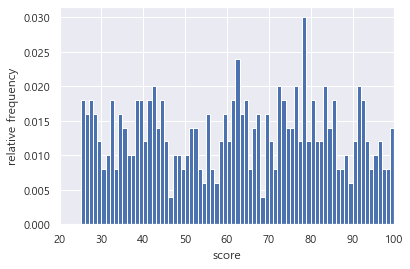

In [15]:
# 모집단 데이터 분포 확인
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.hist(scores, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

In [17]:
# 샘플2 10000개 생성하여 분포 확인
sample_score = np.random.choice(scores, 10000)

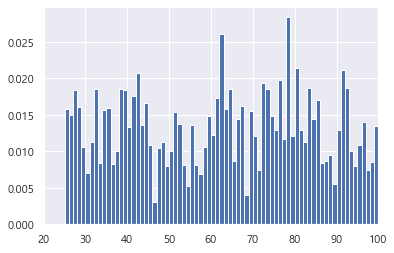

In [19]:
plt.hist(sample_score,bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

In [22]:
# 3) 모평균 점 추정
# 20개(n)의 표본 100번 추출
n=20
nSample=100

sample_mean = np.array([np.random.choice(scores,n,).mean() for _ in range(nSample)])

In [23]:
# 표본평균 분포 확인
sample_mean

array([57.4 , 56.75, 60.35, 55.15, 67.2 , 58.15, 64.15, 67.7 , 58.45,
       58.1 , 60.5 , 58.3 , 63.2 , 65.  , 63.1 , 58.75, 70.2 , 61.3 ,
       60.95, 55.4 , 62.25, 62.7 , 62.8 , 61.05, 71.3 , 56.8 , 73.4 ,
       63.  , 63.15, 65.6 , 64.35, 61.55, 74.35, 51.85, 58.9 , 57.1 ,
       57.1 , 52.8 , 65.8 , 68.9 , 62.75, 54.4 , 57.95, 62.7 , 60.15,
       64.15, 61.4 , 71.75, 54.4 , 60.5 , 59.85, 57.3 , 61.3 , 55.95,
       67.45, 62.45, 61.8 , 55.2 , 61.85, 71.1 , 62.85, 69.7 , 58.15,
       49.75, 58.85, 67.2 , 67.5 , 68.65, 56.1 , 62.8 , 58.  , 57.75,
       59.2 , 55.35, 67.5 , 56.9 , 59.3 , 67.15, 50.75, 63.4 , 72.2 ,
       60.6 , 67.3 , 50.45, 69.55, 69.85, 63.1 , 62.1 , 64.8 , 70.7 ,
       71.25, 58.9 , 63.9 , 62.65, 65.2 , 64.9 , 61.  , 55.7 , 66.4 ,
       55.95])

In [24]:
# 모평균
print('모평균 : ', scores.mean())

# 표본평균의 평균 <= 모집단을 모를 경우 표본평균이 모수로 추정
print('표본평균의 평균:', sample_mean.mean())

# 모분산/n
print('모분산/n :', scores.var()/n)

# 표본평균의 분산
print('표본평균의 분산 :',sample_mean.var())

# 펴본평균ㄴ의 편차
print('표본평균의 표준편차 :', sample_mean.std())

# 표준오차 : standard error of the mean
print('표준오차 :', scores.std()/math.sqrt(n))

모평균 :  61.58
표본평균의 평균: 61.925999999999995
모분산/n : 23.09498
표본평균의 분산 : 29.050024000000004
표본평균의 표준편차 : 5.389807417709839
표준오차 : 4.805723670790903
